## Indian Premier League (IPL) Regression Analysis

In [1]:
# As usual, we begin by loading the packages we will need

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [9]:
# Now we load the data

IPL=pd.read_excel("Data/IPL (assignment) data.xlsx")

In [10]:
IPL

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2014,Sunrisers Hyderabad,14,6,8,0,12,-0.399,0,0,0,0,9803333
88,2015,Sunrisers Hyderabad,14,7,7,0,14,-0.239,0,0,0,0,8104667
89,2016,Sunrisers Hyderabad,14,8,6,0,16,0.245,1,0,0,0,8747666
90,2017,Sunrisers Hyderabad,14,8,5,1,17,0.599,0,0,0,1,8200500


In [11]:
Sumsal = IPL.groupby(['year'])['salaries'].sum().reset_index().rename(columns={'salaries':'allsal'})
Sumsal

,year,allsal
0,2008,34105000
1,2009,33445000
2,2010,33075000
3,2011,62210000
4,2012,59706250
5,2013,81535000
6,2014,73973332
7,2015,65242665
8,2016,63483666
9,2017,63014833


In [12]:
IPL = pd.merge(IPL, Sumsal, on=["year"], how="left")
IPL["realsal"] = IPL["salaries"] / IPL["allsal"]
IPL

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal,realsal
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000,0.170796
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000,0.202272
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000,0.147846
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000,0.101752
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250,0.132314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2014,Sunrisers Hyderabad,14,6,8,0,12,-0.399,0,0,0,0,9803333,73973332,0.132525
88,2015,Sunrisers Hyderabad,14,7,7,0,14,-0.239,0,0,0,0,8104667,65242665,0.124223
89,2016,Sunrisers Hyderabad,14,8,6,0,16,0.245,1,0,0,0,8747666,63483666,0.137794
90,2017,Sunrisers Hyderabad,14,8,5,1,17,0.599,0,0,0,1,8200500,63014833,0.130136


In [13]:
IPL["winp"] = IPL.won / (IPL.played - IPL.noresult)
IPL

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal,realsal,winp
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000,0.170796,0.571429
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000,0.202272,0.615385
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000,0.147846,0.500000
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000,0.101752,0.642857
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250,0.132314,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2014,Sunrisers Hyderabad,14,6,8,0,12,-0.399,0,0,0,0,9803333,73973332,0.132525,0.428571
88,2015,Sunrisers Hyderabad,14,7,7,0,14,-0.239,0,0,0,0,8104667,65242665,0.124223,0.500000
89,2016,Sunrisers Hyderabad,14,8,6,0,16,0.245,1,0,0,0,8747666,63483666,0.137794,0.571429
90,2017,Sunrisers Hyderabad,14,8,5,1,17,0.599,0,0,0,1,8200500,63014833,0.130136,0.615385


<AxesSubplot:xlabel='realsal', ylabel='winp'>

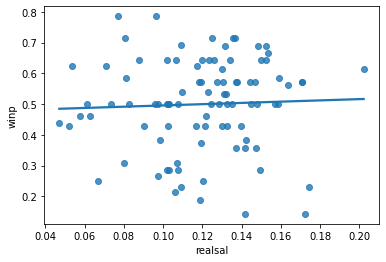

In [15]:
sns.regplot(x="realsal", y="winp", data = IPL, ci=False)

In [16]:
# first we sort the values
IPL.sort_values(by=['team','year'], ascending=True)

# this will allow us to inspect all rows in the data
pd.set_option('display.max_rows', 400)
IPL

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal,realsal,winp
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000,0.170796,0.571429
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000,0.202272,0.615385
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000,0.147846,0.500000
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000,0.101752,0.642857
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250,0.132314,0.533333
5,2013,Chennai Super Kings,16,11,5,0,22,0.530,0,1,0,0,10740000,81535000,0.131723,0.687500
6,2014,Chennai Super Kings,14,9,5,0,18,0.385,0,0,1,0,11279000,73973332,0.152474,0.642857
7,2015,Chennai Super Kings,14,9,5,0,18,0.709,0,1,0,0,9780000,65242665,0.149902,0.642857
8,2018,Chennai Super Kings,14,9,5,0,18,0.253,1,0,0,0,11321760,84370160,0.134192,0.642857
9,2008,Deccan Chargers,14,2,12,0,4,-0.467,0,0,0,0,5885000,34105000,0.172555,0.142857


In [17]:
# now we create the lagged dependend variable

IPL['wpc_lag'] = IPL.groupby('team')['winp'].shift(1)
IPL

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal,realsal,winp,wpc_lag
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000,0.170796,0.571429,NaN
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000,0.202272,0.615385,0.571429
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000,0.147846,0.500000,0.615385
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000,0.101752,0.642857,0.500000
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250,0.132314,0.533333,0.642857
5,2013,Chennai Super Kings,16,11,5,0,22,0.530,0,1,0,0,10740000,81535000,0.131723,0.687500,0.533333
6,2014,Chennai Super Kings,14,9,5,0,18,0.385,0,0,1,0,11279000,73973332,0.152474,0.642857,0.687500
7,2015,Chennai Super Kings,14,9,5,0,18,0.709,0,1,0,0,9780000,65242665,0.149902,0.642857,0.642857
8,2018,Chennai Super Kings,14,9,5,0,18,0.253,1,0,0,0,11321760,84370160,0.134192,0.642857,0.642857
9,2008,Deccan Chargers,14,2,12,0,4,-0.467,0,0,0,0,5885000,34105000,0.172555,0.142857,NaN


In [18]:
reg_1 = smf.ols(formula = 'winp ~ realsal', data=IPL).fit()
print(reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   winp   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1622
Date:                Sat, 30 Apr 2022   Prob (F-statistic):              0.688
Time:                        22:12:24   Log-Likelihood:                 45.259
No. Observations:                  92   AIC:                            -86.52
Df Residuals:                      90   BIC:                            -81.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4752      0.063      7.563      0.0

In [20]:
reg_2 = smf.ols(formula = 'winp ~ realsal + wpc_lag', data=IPL).fit()
print(reg_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   winp   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.591
Date:                Sat, 30 Apr 2022   Prob (F-statistic):              0.210
Time:                        22:18:38   Log-Likelihood:                 43.314
No. Observations:                  79   AIC:                            -80.63
Df Residuals:                      76   BIC:                            -73.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3489      0.087      4.003      0.0

In [21]:
reg_3 = smf.ols(formula = 'winp ~ wpc_lag + realsal +C(team)', data=IPL).fit()
print(reg_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   winp   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     2.117
Date:                Sat, 30 Apr 2022   Prob (F-statistic):             0.0245
Time:                        22:19:19   Log-Likelihood:                 55.639
No. Observations:                  79   AIC:                            -83.28
Df Residuals:                      65   BIC:                            -50.10
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [23]:
IPL

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal,realsal,winp,wpc_lag
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000,0.170796,0.571429,NaN
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000,0.202272,0.615385,0.571429
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000,0.147846,0.500000,0.615385
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000,0.101752,0.642857,0.500000
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250,0.132314,0.533333,0.642857
5,2013,Chennai Super Kings,16,11,5,0,22,0.530,0,1,0,0,10740000,81535000,0.131723,0.687500,0.533333
6,2014,Chennai Super Kings,14,9,5,0,18,0.385,0,0,1,0,11279000,73973332,0.152474,0.642857,0.687500
7,2015,Chennai Super Kings,14,9,5,0,18,0.709,0,1,0,0,9780000,65242665,0.149902,0.642857,0.642857
8,2018,Chennai Super Kings,14,9,5,0,18,0.253,1,0,0,0,11321760,84370160,0.134192,0.642857,0.642857
9,2008,Deccan Chargers,14,2,12,0,4,-0.467,0,0,0,0,5885000,34105000,0.172555,0.142857,NaN
